# MGPO 695 - Sentiment Analysis on Presidential Public Relations through Twitter

The aim of this project is to perform sentiment analysis on tweets published by each of the three current and last presidents of the United States of America in order to draw insights on words that are most associated with people reacting to them, in a good or bad way.
The business idea behind that is to propose a sentiment analysis for a company in charge of taking care of the electoral campaigns for any politician wishing to form an image within a people.

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## II. Biden

In [2]:
df = pd.read_csv("biden.csv")

In [3]:
df.head()

,id,timestamp,url,tweet,replies,retweets,quotes,likes
0,361388562,2007-10-24 22:45,https://twitter.com/JoeBiden/status/361388562,Tune in 11:30 ET tomorrow for a live webcast o...,19,5,17,11
1,543984392,2007-12-29 15:35,https://twitter.com/JoeBiden/status/543984392,"Iowans, there's a good chance there's a Biden ...",13,16,6,22
2,189287227321356289,2012-04-09 09:42,https://twitter.com/JoeBiden/status/1892872273...,We're excited to announce that @JoeBiden is be...,21,82,1,20
3,189287350034104320,2012-04-09 09:43,https://twitter.com/JoeBiden/status/1892873500...,Campaign staff will run this account to keep y...,144,76,37,51
4,189339650610036736,2012-04-09 13:11,https://twitter.com/JoeBiden/status/1893396506...,News for you this morning: VP Biden will speak...,10,54,0,5


#### Data Cleaning

Define the set of stop words to be removed

In [4]:
stop_words = set(stopwords.words("english"))
stop_words.update(["u", "amp", "rt", "the", "to", "is", "of", "and", "a", "in", "for", "are", "@JoeBiden", "joebiden", "biden", "joe", "on", "I"])

Remove tweets that contain URLs

In [5]:
df = df[~df['tweet'].str.contains("http")]

Remove punctuation and convert to lowercase

In [6]:
df['tweet'] = df['tweet'].str.lower().apply(lambda x: re.sub(r'[^\w\s]','', x))

Remove stop words

In [7]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

Remove any rows with empty clean_text values

In [8]:
df = df.dropna(subset=['tweet'])

### Sentiment Analysis

Calculate the sentiment analysis score for each tweet

In [9]:
df["sentiment_score"] = df["tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

Divide tweets into clusters based on sentiment analysis score

In [10]:
sentiment_max = df["sentiment_score"].max()
sentiment_min = df["sentiment_score"].min()
sentiment_range = sentiment_max - sentiment_min
cluster_size = 0.25 * sentiment_range
df["cluster"] = df["sentiment_score"].apply(lambda score: int((score - sentiment_min) / cluster_size))

Generate a word cloud for each cluster

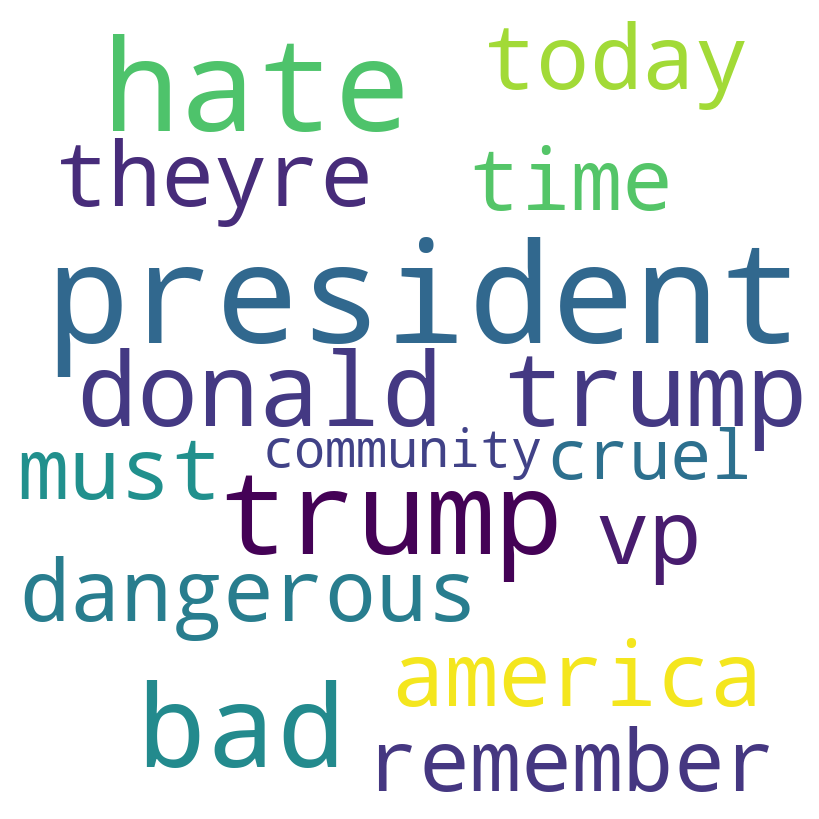

Top 30 Words in Cluster 1: 
         word  frequency
0       trump          7
1   president          6
2        hate          5
3         bad          4
4      donald          4
5      theyre          3
6   dangerous          3
7     america          3
8        must          3
9          un          3
10      cruel          3
11        kim          3
12         vp          3
13       weve          3
14   remember          3
15  community          3
16    violent          3
17        con          3
18       life          2
19     united          2
20       away          2
21        one          2
22      thing          2
23    working          2
24      build          2
25    covid19          2
26       bill          2
27      thank          2
28    mosques          2
29     nation          2


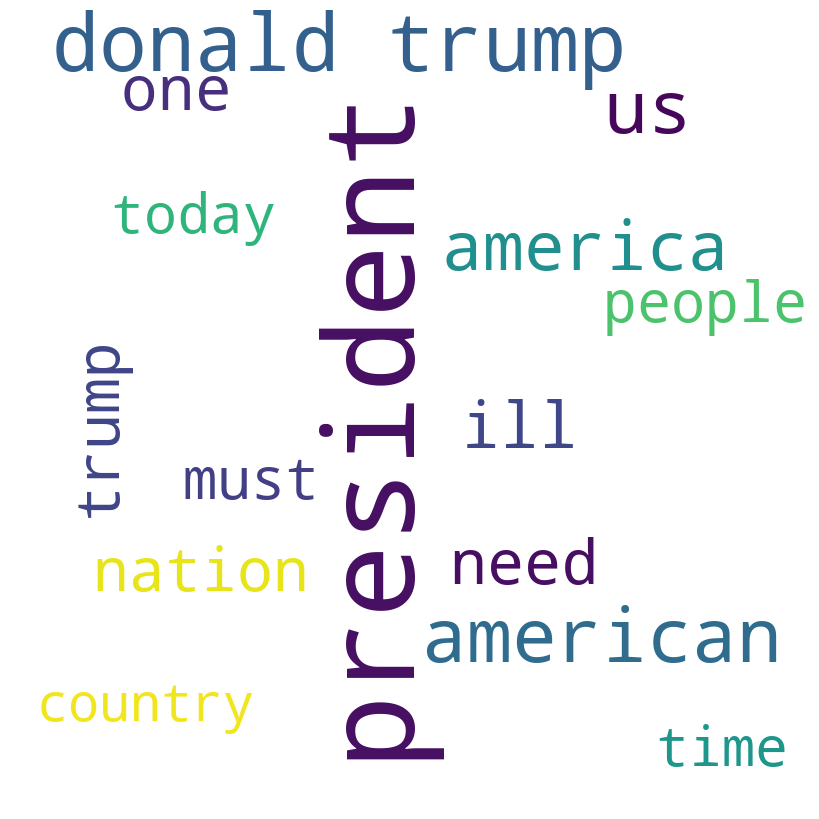

Top 30 Words in Cluster 2: 
         word  frequency
0   president        134
1       trump        102
2      donald         73
3         ill         64
4          us         60
5      people         50
6      nation         49
7    american         49
8        need         45
9         one         44
10    america         43
11      every         38
12        day         37
13  americans         37
14       must         35
15     health         35
16       time         33
17       hate         32
18      white         31
19      today         31
20    country         30
21      years         30
22     trumps         29
23   violence         29
24   together         27
25        get         27
26       make         27
27       work         27
28        end         27
29       cant         27


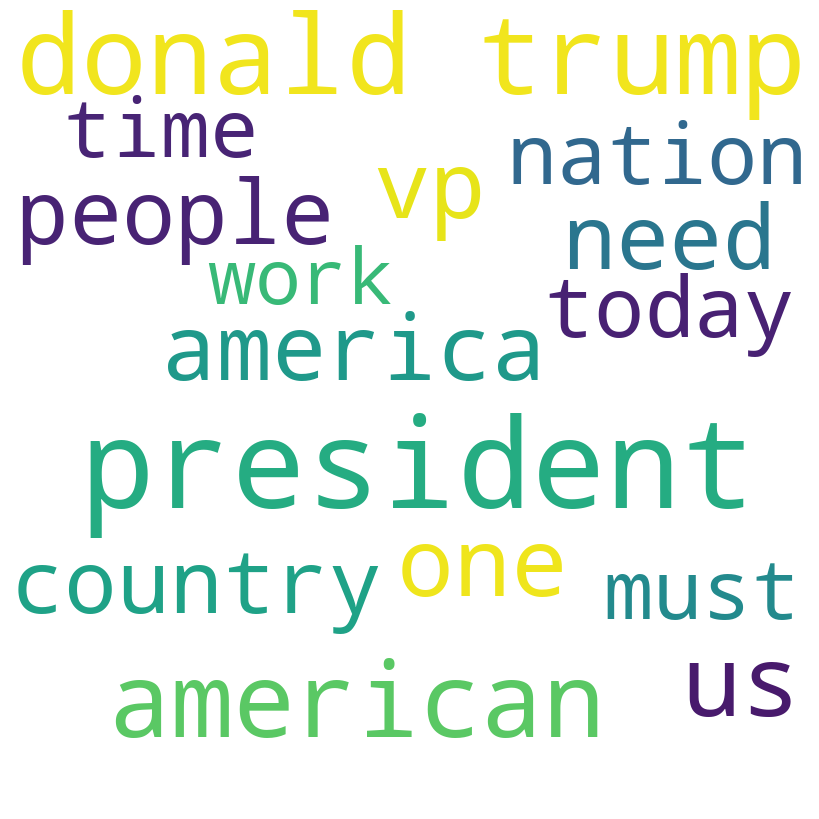

Top 30 Words in Cluster 3: 
         word  frequency
0   president        384
1       trump        269
2      donald        175
3      people        173
4     country        150
5    american        146
6          us        143
7         one        143
8          vp        142
9        need        132
10      every        122
11    america        120
12     nation        115
13        get        104
14       care        102
15      years         99
16       make         98
17     health         96
18       time         96
19      today         96
20         im         94
21       must         92
22       work         91
23  americans         90
24        day         90
25     middle         85
26   together         84
27       back         80
28       cant         77
29  demdebate         73


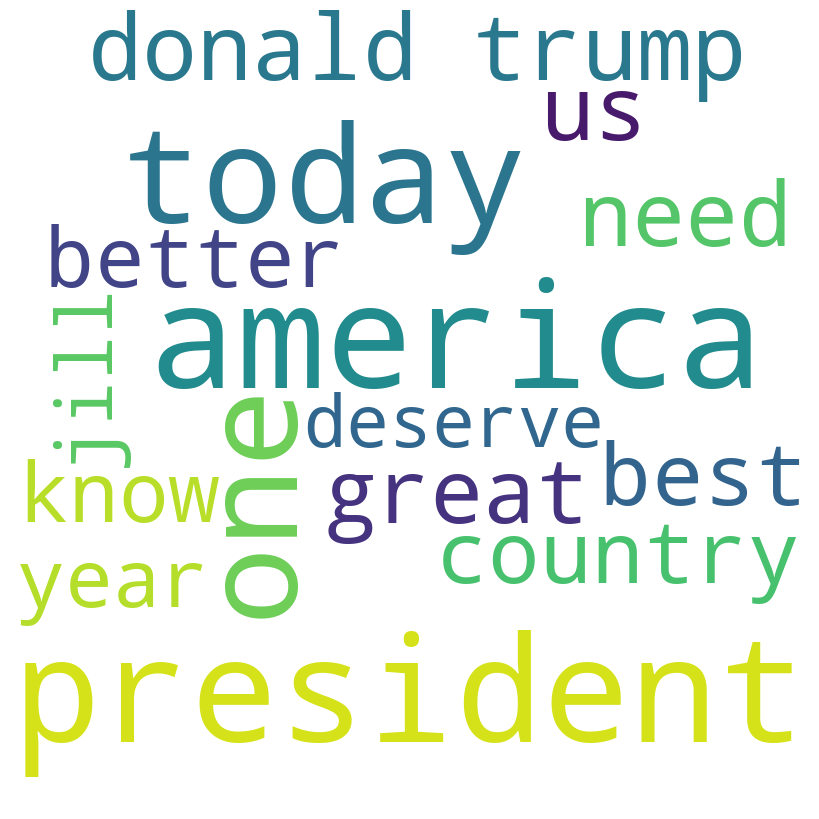

Top 30 Words in Cluster 4: 
         word  frequency
0   president         32
1       proud         28
2     america         22
3       trump         22
4       today         20
5     country         20
6      donald         18
7        make         18
8          im         17
9        fair         17
10       need         17
11      great         17
12         us         17
13       best         16
14     nation         16
15        one         16
16       good         15
17     better         15
18      stand         15
19       jill         13
20       know         13
21      every         13
22     people         13
23       like         13
24        act         12
25      fight         12
26       must         12
27       made         12
28       many         11
29    dignity         11


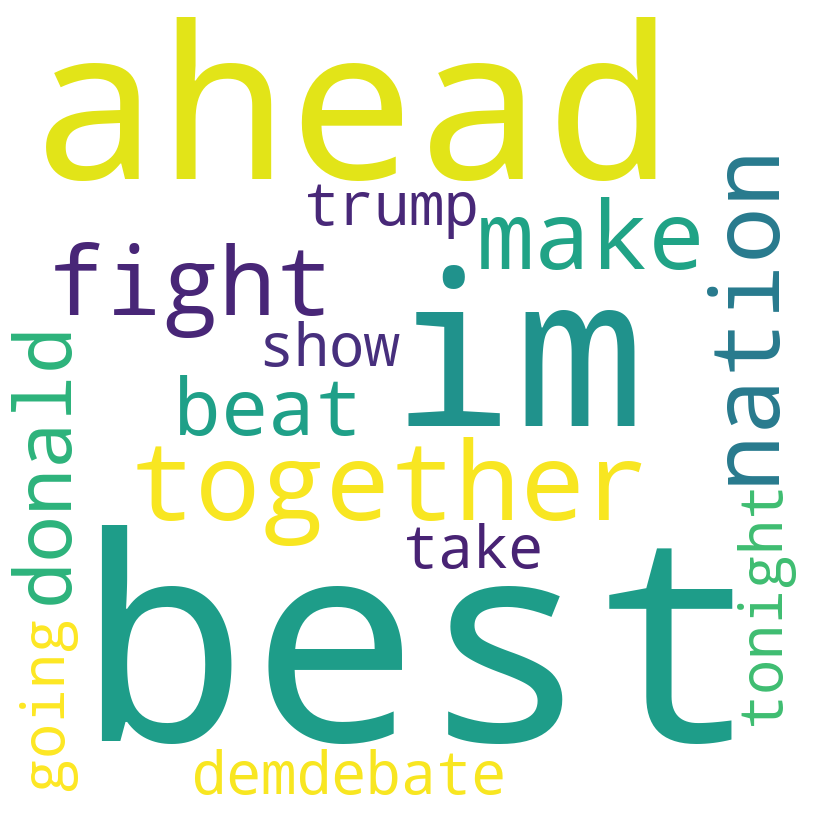

Top 30 Words in Cluster 5: 
         word  frequency
0        best          8
1       ahead          4
2    together          4
3          im          4
4      nation          3
5       fight          3
6        make          3
7     believe          2
8   president          2
9        beat          2
10    mistake          2
11       days          2
12         us          2
13      still          2
14        lie          2
15       know          2
16  candidate          2
17       show          2
18      going          2
19        one          2
20  demdebate          2
21       take          2
22     moment          2
23  neighbors          2
24      trump          2
25     donald          2
26        get          2
27      folks          1
28       lift          1
29      thing          1


In [11]:
for i in range(df["cluster"].nunique()):
    # filter tweets for the current cluster
    cluster_df = df[df["cluster"] == i]
    # concatenate the text of all tweets in the current cluster
    text = " ".join(cluster_df["tweet"])
    # generate the word cloud for the current cluster
    wordcloud = WordCloud(width=800, height=800, max_words=15, background_color="white").generate(text)
    # plot the word cloud for the current cluster
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    # generate a table of word frequencies for the current cluster
    word_freq = pd.Series(text.split()).value_counts().reset_index()
    word_freq.columns = ["word", "frequency"]
    top_30_words = word_freq.head(30)
    print("Top 30 Words in Cluster {}: ".format(i+1))
    print(top_30_words)

* **Cluster 1 (Sentiment score between -1.0 and -0.6)**: This cluster of words appears to be related to former US President Donald Trump and the negative emotions and events associated with his presidency. The words "hate," "bad," and "cruel" indicate the negativity and divisiveness that Trump's leadership brought about. The word "dangerous" suggests that Trump's actions had potential harm for the country, and "violent" further emphasizes this notion. The inclusion of **"COVID19"** suggests that the pandemic, which was a major event during Trump's presidency, may have been a key point of concern. Additionally, the words "VP" and "Kim" may refer to Vice President Mike Pence and North Korean leader Kim Jong-un, respectively, **indicating Trump's foreign policy and relationships were also of concern. Overall, this cluster suggests that there was a strong negative sentiment towards Trump's presidency and the actions he took while in office.**

* **Cluster 2 (Sentiment score between -0.6 and -0.2)**: This cluster of words appears to focus on topics related to the presidency of Donald Trump, the American people, and the country as a whole. The words "president," "Trump," and "Donald" all suggest a focus on the leadership of the United States during Trump's tenure. The words "people," "nation," "American," and "Americans" all indicate a focus on the citizens of the country and their needs. The words "health" and "violence" suggest a focus on public safety and well-being. The word "white" suggests a focus on race relations and issues related to diversity. The phrase "together" suggests a call for unity and working towards common goals. Thus, this cluster suggests that **there was a strong focus on the leadership, needs, and safety of the American people during the Trump presidency, with a particular emphasis on unity, health, and issues related to race and diversity**.

* **Cluster 3 (Sentiment score between -0.2 and 0.2)**: This cluster of words appears to focus on topics related to the presidency of Donald Trump and the needs of the American people. The words "president," "Trump," and "Donald" all suggest a focus on the leadership of the United States during Trump's tenure. The words "people," "American," and "Americans" all indicate a focus on the citizens of the country and their needs. The words "country" and "nation" suggest a focus on issues related to patriotism and the well-being of the country as a whole. The phrase "middle" may suggest a focus on issues related to the middle class and their economic well-being. The words "care" and "health" suggest a focus on issues related to healthcare and public safety. The phrase "together" suggests a call for unity and working towards common goals. **Hence, this cluster suggests that there was a strong focus on the leadership and needs of the American people during the Trump presidency, with a particular emphasis on issues related to healthcare, patriotism, and economic well-being.**

* **Cluster 4 (Sentiment core between 0.2 and 0.6)**: This cluster of words appears to focus on topics related to American patriotism and the pride in the country's accomplishments. The words "president," "America," "country," and "nation" all suggest a focus on American identity and its leadership. The word "proud" is the most frequent word in this cluster, suggesting a strong emphasis on feelings of pride in the United States. The words "great," "good," and "better" suggest a focus on the country's accomplishments and its potential for improvement. The phrase "make America great" is a recurring theme in this cluster. The word "fair" may suggest a focus on issues related to justice and equality, while the word "dignity" may indicate a focus on respecting the value of all individuals. **Overall, this cluster suggests that there was a strong emphasis on American pride and identity, as well as a focus on issues related to justice and equality, during the time period represented by these words.**

* **Cluster 5 (Sentiment score between 0.6 and 1.0)**: Since this cluster only has 2 or 3 mentions of most of the words, it's not really meaningful to analyze it in the same way as the other clusters. However, some observations can still be made. The most frequent word in this cluster is "best," which could suggest that the messages in this cluster are positive or optimistic in tone. There are also some words related to campaigning, such as "candidate" and "demdebate," and some words related to taking action, such as "fight" and "take." **Overall, this cluster seems to contain a mix of relatively generic and positive messages, and they seem to lean toward candidacy and election situations and periods.**

Create a scatter plot of sentiment_score vs. retweets

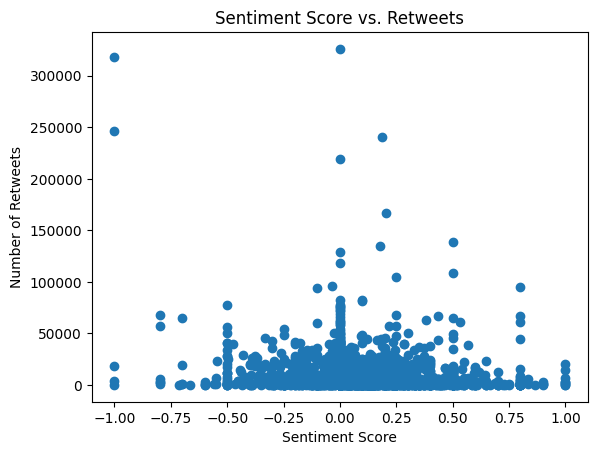

In [14]:
plt.scatter(df["sentiment_score"], df["retweets"])
plt.title("Sentiment Score vs. Retweets")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Retweets")
plt.show()

Create a scatter plot of sentiment_score vs. favorites

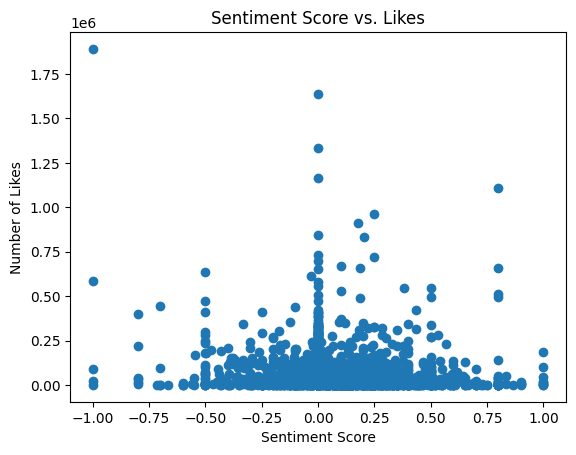

In [15]:
plt.scatter(df["sentiment_score"], df["likes"])
plt.title("Sentiment Score vs. Likes")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Likes")
plt.show()

Create a list to store the total retweets for each cluster, loop through each cluster and calculate the total retweets to plot a histogram of sentiment score vs. total retweets for each cluster

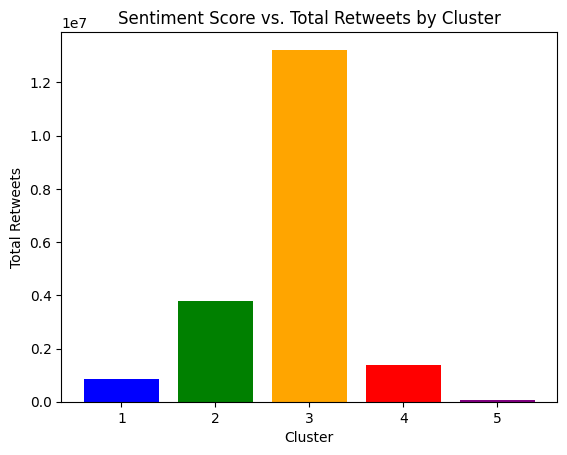

In [16]:
retweets_by_cluster = []

for i in range(df["cluster"].nunique()):
    cluster_df = df[df["cluster"] == i]
    total_retweets = cluster_df["retweets"].sum()
    retweets_by_cluster.append(total_retweets)
    
colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.bar(range(1, df["cluster"].nunique()+1), retweets_by_cluster, color=colors)
plt.title("Sentiment Score vs. Total Retweets by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Retweets")
plt.xticks(range(1, df["cluster"].nunique()+1))
plt.show()

Create a list to store the total favorites for each cluster, loop through each cluster and calculate the total favorites to plot a histogram of sentiment score vs. total favorites for each cluster

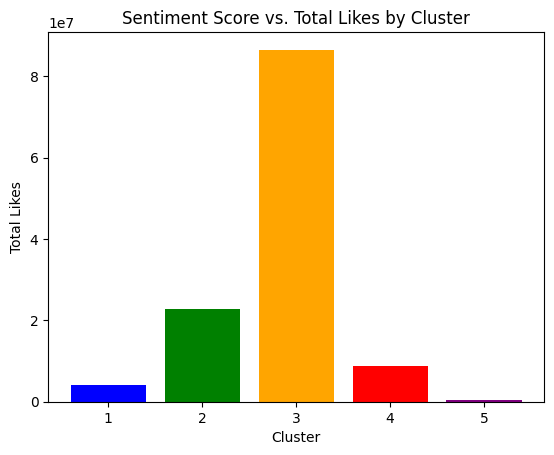

In [17]:
favorites_by_cluster = []

for i in range(df["cluster"].nunique()):
    cluster_df = df[df["cluster"] == i]
    total_favorites = cluster_df["likes"].sum()
    favorites_by_cluster.append(total_favorites)
    
colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.bar(range(1, df["cluster"].nunique()+1), favorites_by_cluster, color=colors)
plt.title("Sentiment Score vs. Total Likes by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Likes")
plt.xticks(range(1, df["cluster"].nunique()+1))
plt.show()

Print the average retweets for each cluster

In [18]:
# calculate the average retweets per cluster
avg_retweets = df.groupby('cluster')['retweets'].mean()

# print the average retweets per cluster
print(avg_retweets)

cluster
0    33824.880000
1     9859.429688
2     9112.137052
3     7829.777143
4     5559.555556
Name: retweets, dtype: float64


Print the average favorites for each cluster

In [19]:
# calculate the average favorites per cluster
avg_favorites = df.groupby('cluster')['likes'].mean()

# print the average favorites per cluster
print(avg_favorites)

cluster
0    163028.080000
1     59146.395833
2     59586.893251
3     49800.371429
4     42029.333333
Name: likes, dtype: float64


### How to interpret the above graphs and numbers:

The graphs showing the sentiment score v.s. retweets or likes generates a normal distribution, which means that the total likes and retweets are distributed evenly across the clusters. On the other hand, the average number of likes and retweets per clusters shows that there is a significant difference in the average likes/retweets per cluster, with cluster 1 having the highest average likes per tweet and cluster 5 having the lowest. 

This suggests that cluster 1 contains more popular or viral tweets, while cluster 5 contains less engaging tweets. **We can conclude that, on average, we could expect tweets expressing general feelings of anger or negativity to induce a much larger public response than messages revolving around positivity and glorifications of political achievements.**

#### Factors that drive retweetting and favoriting behavior on Twitter

1. Content quality: High-quality content that is interesting, informative, and entertaining is more likely to be retweeted.


2. Emotional engagement: Emotional content that triggers strong feelings such as happiness, awe, or anger is more likely to be retweeted.


3. Relevance: Content that is relevant to the interests of a user's followers or the general Twitter audience is more likely to be retweeted.


4. Timeliness: Fresh and current content that is related to current events or trending topics is more likely to be retweeted.


5. Source credibility: Content shared by credible sources such as verified accounts or reputable news sources is more likely to be retweeted.

# Which topics to bring up on Twitter to spark conversation, be a popular subject, and to be liked by your community

### (based on Biden's Twitter activity)

Based on the average number of retweets per cluster, it appears that tweets from cluster 1 generated the highest number of retweets, followed by cluster 2 and 3. This suggests that **negative sentiment towards former presidencies and the actions they took while in office, as well as health, foreign policies, race and religions can generate a high level of emotional engagement and relevance with Twitter users, which can drive retweets and likes.**

On the other hand, tweets from cluster 4 and 5 generated the lowest number of retweets, indicating that **positive sentiments and expressions of support for the US or to American pride and identity may not be as effective in generating retweets as criticism or frustration with political or social issues.**

Therefore, someone who wants to generate a high level of retweets on Twitter should focus on discussing issues related to former presidencies, foreign polities, race and religion to tap into the emotional engagement and relevance of Twitter users. It's also important to ensure that the tweets are of high quality, timely, and credible to maximize their impact.